In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Top
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.stats.mstats import winsorize

link to the dataset: https://docs.google.com/spreadsheets/d/1K2pGp3JWeyBJNF2sbdSB6cDch-xXvHIz/edit?usp=sharing&ouid=110577013738099443083&rtpof=true&sd=true 

In [3]:
df = pd.read_excel('/content/drive/MyDrive/South Bank University/Teaching/CSI L7 - Data Mining and Analysis/05 - Week 5 - Clustering/blood.xlsx')

In [4]:
print(df.shape)
df.head()

(30, 2)


,Age,Pressure
0,39,144
1,47,220
2,45,138
3,47,145
4,65,162


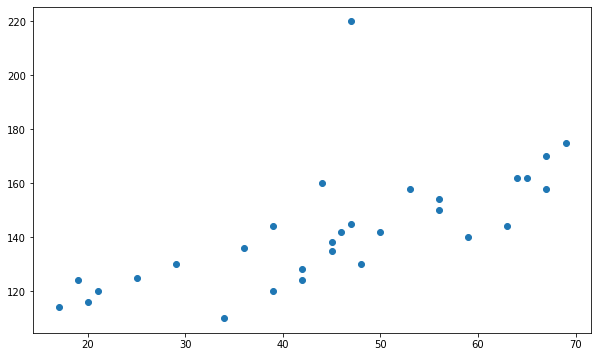

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df['Age'], df['Pressure'])
plt.show()

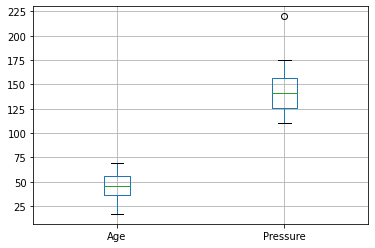

In [6]:
# scatterplot: some obvious trend, one outlier
df.boxplot()

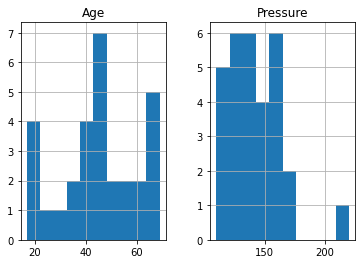

In [7]:
df.hist()
plt.show()

In [51]:
# @title clustering function
def cluster(k, df, algo):
  if algo == 'kmeans':
    model = KMeans(n_clusters=k)
  
  if algo == 'agglomerative':
    model = AgglomerativeClustering(n_clusters=k)

  if algo == 'dbscan':
    model = DBSCAN(eps=0.5, min_samples=k)

  labels = model.fit_predict(df)

  # Plot the results
  plt.scatter(df['Age'], df['Pressure'], c=labels)
  plt.xlabel('Age')
  plt.ylabel('Blood Pressure')
  plt.title('Cluster Analysis')
  plt.show()

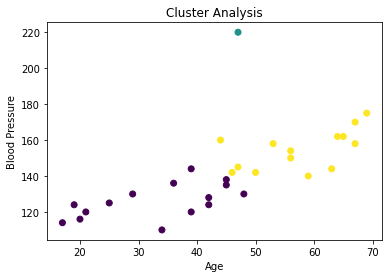

In [52]:
# @title clusters on raw data
# 3 clusters with kmeans
# cluster(k=3, df=df, algo='kmeans')
cluster(3, df, 'kmeans')

In [10]:
# outlier forms its own cluster!

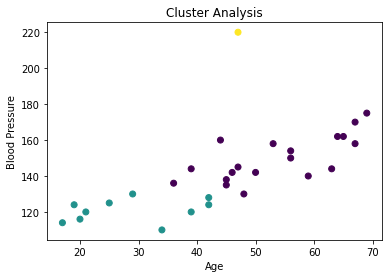

In [50]:
# 3 clusters with agglomerative 
cluster(3, df, 'agglomerative')

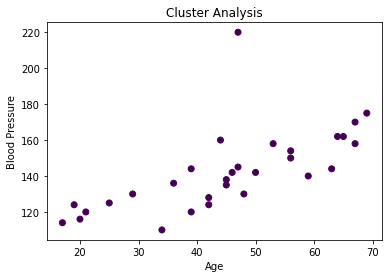

In [12]:
# clustering with dbscan
cluster(3, df, 'dbscan')

In [13]:
# @title normalisation
df_norm = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.head()

,Age,Pressure
0,0.423077,0.309091
1,0.576923,1.000000
2,0.538462,0.254545
3,0.576923,0.318182
4,0.923077,0.472727


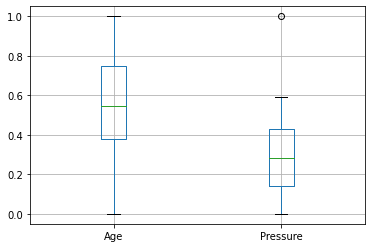

In [14]:
df_norm.boxplot()
# shows the outlier too extreme

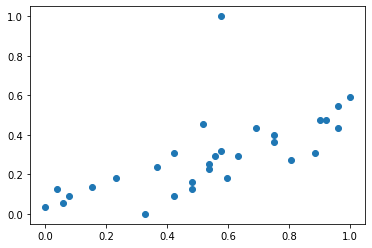

In [15]:
plt.scatter(df_norm['Age'], df_norm['Pressure'])

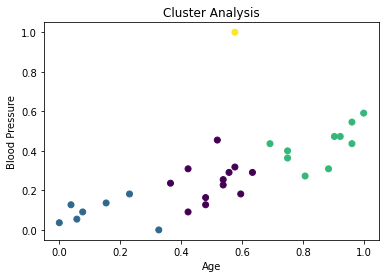

In [16]:
# @title clusters on normalised data
# 4 clusters with df_norm kmeans
cluster(4, df_norm, 'kmeans')

In [17]:
# outlier still forms its own cluster

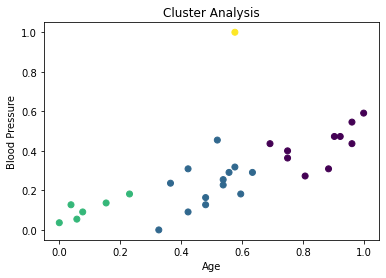

In [18]:
cluster(4, df_norm, 'agglomerative')

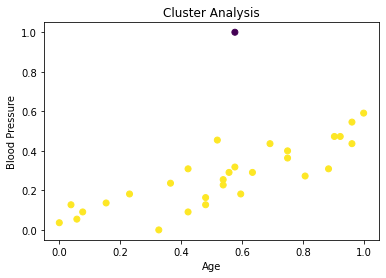

In [19]:
cluster(4, df_norm, 'dbscan')

In [20]:
# @title standardisation
df_std = df.apply(lambda x: (x - x.mean())/ x.std())
df_std.head()

,Age,Pressure
0,-0.401023,0.064951
1,0.122051,3.430575
2,-0.008718,-0.200757
3,0.122051,0.109235
4,1.298967,0.862072


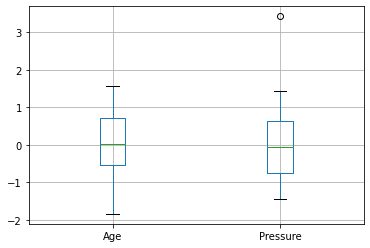

In [21]:
df_std.boxplot()

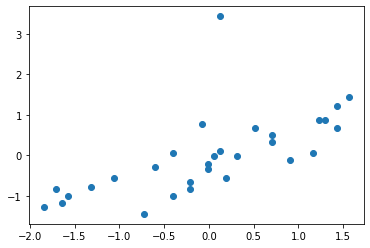

In [22]:
plt.scatter(df_std['Age'], df_std['Pressure'])

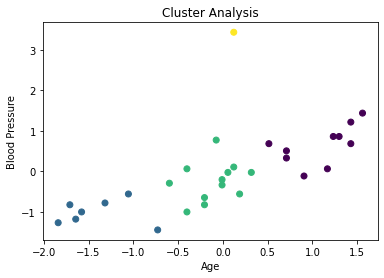

In [23]:
# @title clusters on standardised data
cluster(4, df_std, 'kmeans')

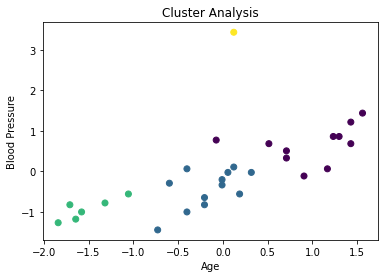

In [24]:
# 3 clusters with agglomerative
cluster(4, df_std, 'agglomerative')

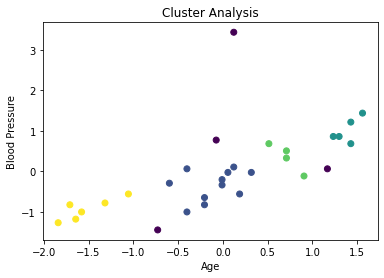

In [25]:
# dbscan algorithm: Note k is not the num_clusters but min_samples
cluster(4, df_std, 'dbscan')
# outlier finally clustered with other data points but clusters not clean

In [26]:
# @title MAD scaling
# Median Absolute Value scaling (deals better with outliers)
def mad_scale(X):
  median = df.median()
  mad = np.median(np.abs(X - median), axis=0)
  return (X - median)/mad

In [27]:
df_mad = mad_scale(df)
df_mad.head()

,Age,Pressure
0,-0.619048,0.181818
1,0.142857,4.787879
2,-0.047619,-0.181818
3,0.142857,0.242424
4,1.857143,1.272727


In [28]:
df_mad.describe()

,Age,Pressure
count,30.000000,30.000000
mean,-0.034921,0.092929
std,1.456591,1.368560
min,-2.714286,-1.878788
25%,-0.833333,-0.924242
50%,0.000000,0.000000
75%,1.000000,0.969697
max,2.238095,4.787879


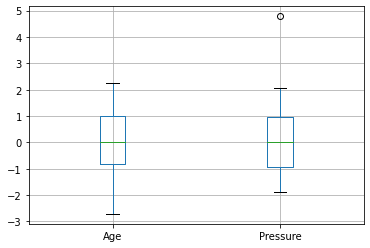

In [29]:
df_mad.boxplot()

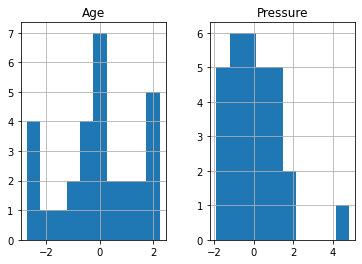

In [30]:
df_mad.hist()
plt.show()

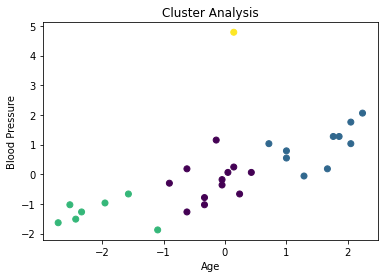

In [31]:
cluster(4, df_mad, 'kmeans')

In [32]:
# @title Winsorizing
# 10% limit on each attribute
df_winsorized = df.apply(lambda x: winsorize(x, limits=[0.1, 0.1]))

In [33]:
print(df_winsorized.head())
print(df_winsorized.shape)

   Age  Pressure
0   39       144
1   47       162
2   45       138
3   47       145
4   65       162
(30, 2)


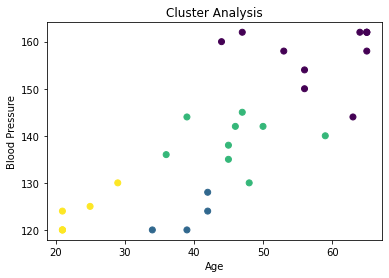

In [34]:
cluster(4, df_winsorized, 'kmeans')

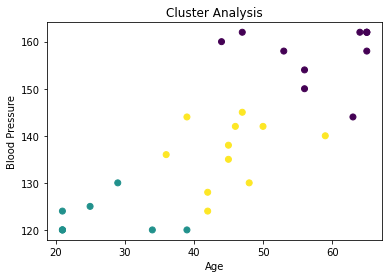

In [35]:
cluster(3, df_winsorized, 'kmeans')

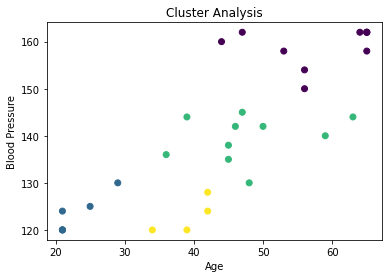

In [36]:
cluster(4, df_winsorized, 'agglomerative')

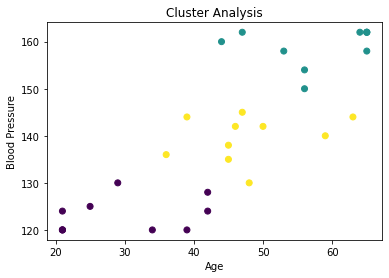

In [37]:
cluster(3, df_winsorized, 'agglomerative')

In [38]:
# @title clean data based on zscore
df_std['Pressure_zscore'] = (df_std['Pressure'] - df_std['Pressure'].mean()) / df_std['Pressure'].std()
df_std.head()

,Age,Pressure,Pressure_zscore
0,-0.401023,0.064951,0.064951
1,0.122051,3.430575,3.430575
2,-0.008718,-0.200757,-0.200757
3,0.122051,0.109235,0.109235
4,1.298967,0.862072,0.862072


In [39]:
df.nlargest(5, 'Pressure')

,Age,Pressure
1,47,220
29,69,175
6,67,170
4,65,162
10,64,162


In [40]:
# remove d-points with zscore > +-3
threshold = 3
df_std_clean = df_std[abs(df_std['Pressure_zscore']) <= threshold]
print(df_std.shape)
df_std_clean.head()

(30, 3)


,Age,Pressure,Pressure_zscore
0,-0.401023,0.064951,0.064951
2,-0.008718,-0.200757,-0.200757
3,0.122051,0.109235,0.109235
4,1.298967,0.862072,0.862072
5,0.056666,-0.023618,-0.023618


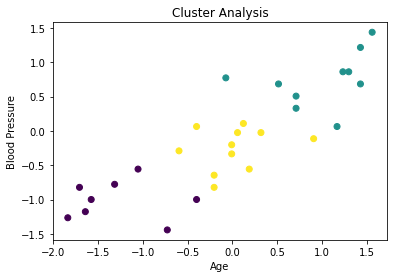

In [41]:
# @title clusters on cleaned data
cluster(3, df_std_clean, 'kmeans')

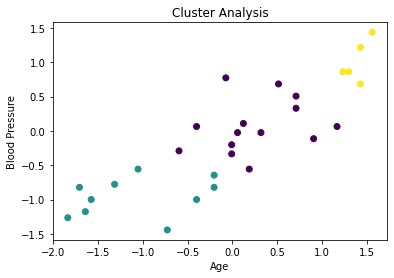

In [42]:
cluster(3, df_std_clean, 'agglomerative')

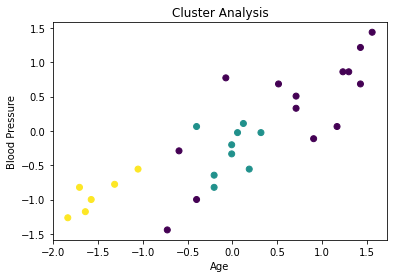

In [43]:
cluster(4, df_std_clean, 'dbscan')

Potential causes for the outlier behaviour:   
1. outlier is too extreme from the rest of the samples. 
2. sample size too small for the clustering algorithm to identify groups
3. larger sample sizes in general improve cluster reliability

In [44]:
# @title Bottom